**Exploratory Data Analysis**

Before beginning any feature engineering or modeling process, this notebook focuses on comprehending the dataset's structure, quality, and patterns. Examining data distributions, spotting outliers or missing values, investigating correlations between variables, and laying a solid foundation for subsequent workflow phases are the objectives of this EDA.

I examine the dataset column by column in this notebook, highlight significant trends, address discrepancies, and record insights that affect additional preprocessing and decision-making.

In [11]:
import os
print(os.getcwd())

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


d:\Data Analysis\DA projects\EDA and Feature Engineering Flight Price Dataset\notebooks


In [14]:
df = pd.read_csv("D:\Data Analysis\DA projects\EDA and Feature Engineering Flight Price Dataset\Data\cleaned_airline.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Karthik Chindam\AppData\Local\Temp\ipykernel_6976\1054958299.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Data Analysis\DA projects\EDA and Feature Engineering Flight Price Dataset\Data\cleaned_airline.csv")


In [16]:
# numerical columns

df.describe()



,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


In [17]:
# categorical columns

df.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3700,490,4345,4345,2376,233,412,544,5625,8182


Target vaiable analysis

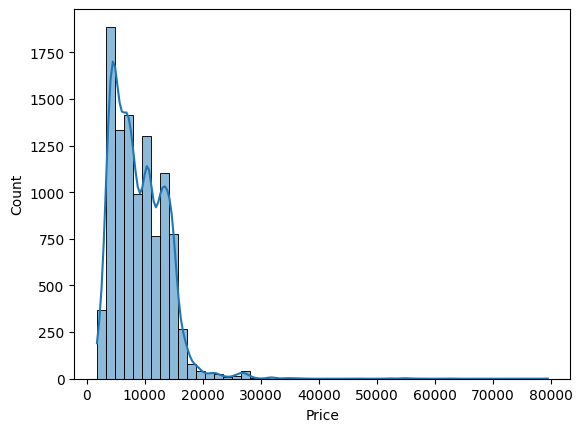

1.8574899082173875


In [18]:
 # Price distribution

sns.histplot(df['Price'], bins=50, kde=True)
plt.show()

#for checking skewness

print(df['Price'].skew())

-> The price distribution is strongly right-skewed, with most flights concentrated in the ₹4,000–₹15,000 range.

->A long right tail indicates genuinely high-priced flights (business class, multi-stop, or last-minute), not noise.

->Because of this skewness, the median represents typical prices better than the mean.

Categorical analysis

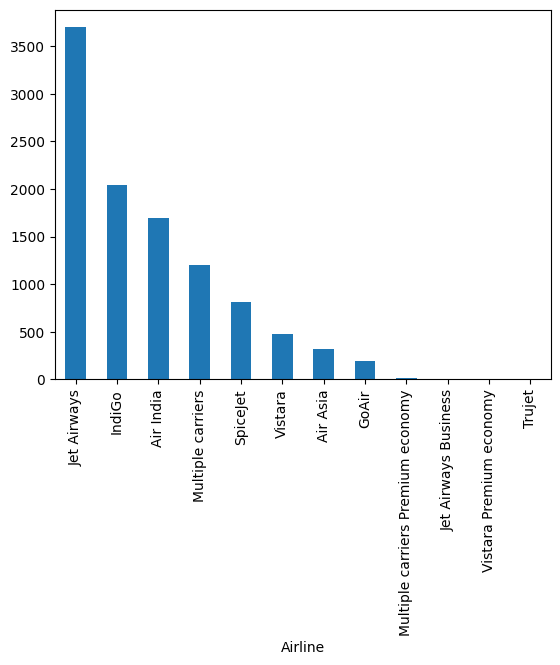

In [23]:
# Airline counts
df['Airline'].value_counts().plot(kind='bar')
plt.show()




**Observations**

• Jet Airways dominates the dataset by a huge margin, indicating high market share or more recorded bookings.

• Budget airlines like IndiGo and Air India follow, while premium classes (Business, Premium Economy) appear extremely rarely.

• The long tail of rare categories suggests heavy class imbalance in the Airline feature.

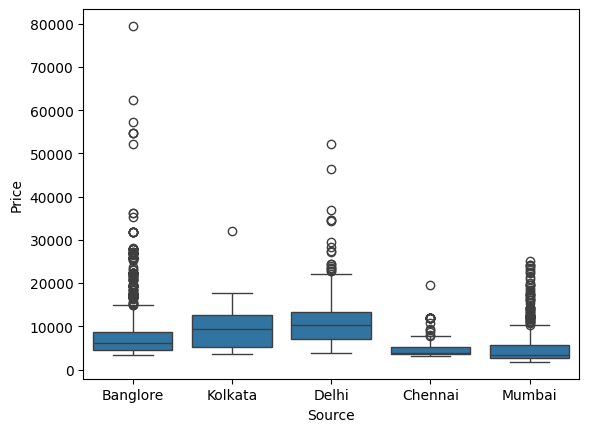

In [24]:
# Source vs Price
sns.boxplot(x='Source', y='Price', data=df)
plt.show()



**Observations**

• Delhi and Kolkata departures show noticeably higher price ranges and more expensive outliers.

• Chennai and Mumbai departures are relatively cheaper with more compact distributions.

• Banglore has the widest spread, indicating high variability in routes and demand.

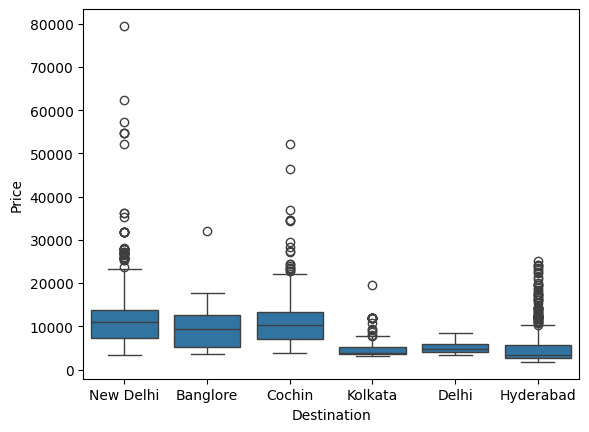

In [25]:
# Destination vs Price
sns.boxplot(x='Destination', y='Price', data=df)
plt.show()

**Observations**

• New Delhi and Cochin destinations exhibit the highest prices and most extreme outliers.

• Kolkata and Delhi destinations are on the lower end with tighter spreads.

• Price differences by destination clearly show that route geography significantly affects fare patterns.

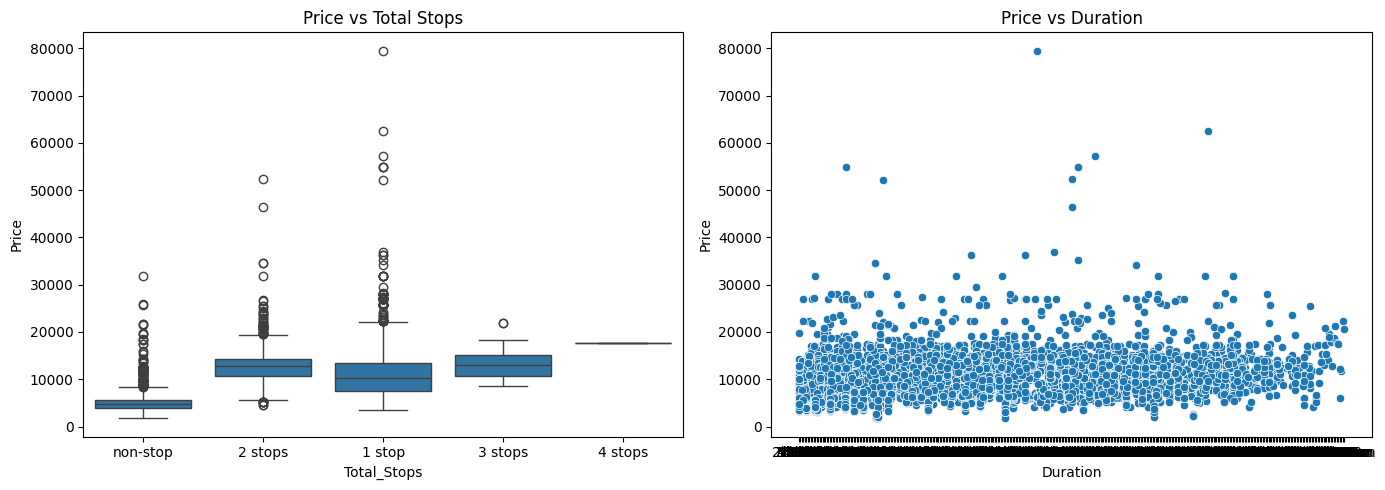

In [31]:
# Stops and Duration

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[0])
axes[0].set_title('Price vs Total Stops')

# Scatterplot
sns.scatterplot(x='Duration', y='Price', data=df, ax=axes[1])
axes[1].set_title('Price vs Duration')

plt.tight_layout()
plt.show()



**Total Stops vs Price**

**->** More stops clearly push prices upward — 1-stop and 2-stop flights are noticeably costlier than non-stop ones.

**->** Extreme high-price outliers mainly show up in 1-stop/2-stop categories, not in non-stop.

**->** 4-stop flights are rare but consistently overpriced.

**Duration vs Price**

**->** There’s no clean linear relation-longer duration doesn’t guarantee higher price.

**->** High-price outliers appear across all durations, meaning timing and class impact fares more than duration alone.

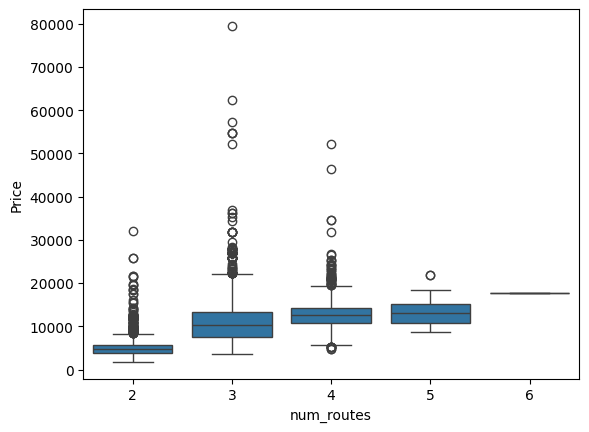

In [29]:
# Route patterns

df['num_routes'] = df['Route'].apply(lambda x: len(str(x).split('→')))
sns.boxplot(x='num_routes', y='Price', data=df)
plt.show()


**Observations**

**->** Higher prices = more routes. The median price of flights with three to five segments is always higher than that of flights with two segments.

**->** Pricing for complex routes is messy. The spread widens when the number of routes exceeds three, signifying unpredictable pricing.


**->** Only 3–4 route flights have extreme outliers, indicating that multi-segment paths frequently result in overpriced tickets.

**EDA Summary**

**->** The flight duration and the number of routes are two important factors that drive price increases.

**->** High-end outliers and a significant price skew, particularly for multi-stop routes.

**->** Both cost and variability are increased by route complexity.

**->** The data is clean for modeling because there are no significant missing values.

**->** Price differences are evident in categorical features (airline, source, destination), which will be important in FE.